## Study the distribution of LDA/NMF topics

In [5]:
import pickle
from utils import * 
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

Load the pre-trained models

In [6]:
DATAPASS = '../../../yelp10/dataset/business.json'
business = load_json_to_df(DATAPASS)

In [7]:
DATAPASS = '../../../yelp10/dataset/review.json'
reviews = load_json_to_df(DATAPASS)

In [235]:
reviews.groupby('business_id').count()[:10]

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
--6MefnULPED_I942VcFNA,30,30,30,30,30,30,30,30
--7zmmkVg-IMGaXbuVd0SQ,42,42,42,42,42,42,42,42
--8LPVSo5i0Oo61X01sV9A,3,3,3,3,3,3,3,3
--9QQLMTbFzLJ_oT-ON3Xw,9,9,9,9,9,9,9,9
--9e1ONYQuAa-CB_Rrw7Tw,1389,1389,1389,1389,1389,1389,1389,1389
--DaPTJW3-tB1vP-PfdTEg,37,37,37,37,37,37,37,37
--DdmeR16TRb3LsjG0ejrQ,5,5,5,5,5,5,5,5
--EX4rRznJrltyn-34Jz1w,3,3,3,3,3,3,3,3
--FBCX-N37CMYDfs790Bnw,100,100,100,100,100,100,100,100


In [9]:
def load_topic_model(vectorizer_file_name, topic_model_file_name):
    '''
    Unpickle pretrained model
    Make sure to use tf_idf for nmf, count_vec for lda
    
    Input:
        vectorizer_file_name(str) : directory for vectorizer
        topic_model_file_name(str) : directory for topic model
    Output:
        vectorizer : trained object
        topic_model: trained object
    '''
    with open(vectorizer_file_name, "rb") as f:
        vectorizer = pickle.load(f)
    with open(topic_model_file_name, "rb") as f:
        topic_model = pickle.load(f)
    return vectorizer, topic_model

In [10]:
vec, tm = load_topic_model('model/pizza_tfidf_vectorizer.pkl','model/pizza_nmf.pkl')

In [11]:
vec2, tm2 = load_topic_model('model/pizza_count_vectorizer.pkl','model/pizza_lda.pkl')

In [12]:
vec3, tm3 = load_topic_model('model/chinese_tfidf_vectorizer.pkl','model/chinese_nmf.pkl')

In [13]:
vec4, tm4 = load_topic_model('model/chinese_count_vectorizer.pkl','model/chinese_lda.pkl')

In [229]:
def display_topics(model, feature_names, n_top_words):
    '''
    display topic with n_top_words in a decsending order of weight
    
    Input:
        model : directory for vectorizer
        feature_names : list of vocabulary 
        n_top_words(int) : number of words to display for each topic

    '''
    for topic_index, topic in enumerate(model.components_):
        print("Topic %d:" % topic_index)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words:-1]]))

In [15]:
tm.components_

array([[  5.35318219e-02,   0.00000000e+00,   4.09802948e-02, ...,
          7.96897006e-02,   3.98538679e-02,   0.00000000e+00],
       [  7.86209423e-02,   1.88202333e-01,   3.27705625e-02, ...,
          2.97546372e-02,   9.73259392e-02,   0.00000000e+00],
       [  3.54345514e-01,   2.62719244e+00,   1.12437870e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.13455229e-02,   0.00000000e+00,   4.27813136e-04, ...,
          0.00000000e+00,   6.59642074e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.22001617e-02,   1.51870707e-01,   0.00000000e+00],
       [  1.37329447e-02,   0.00000000e+00,   7.26685010e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [16]:
tm2.components_

array([[  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000001e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       ..., 
       [  2.00000000e-02,   1.30035557e+04,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.24278850e+02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02]])

In [10]:
# DATAPASS2 = '../../../yelp10/dataset/review.json'
# review = load_json_to_df(DATAPASS2)

In [11]:
# DATAPASS = '../../../yelp10/dataset/business.json'
# business = load_json_to_df(DATAPASS)

In [230]:
def business_id_retrieval(cat, business):
    '''
    Input:
        cat(str) : category
        business(dataframe) : the business data
    Output:
        id_list(set) : business ids of a particular category
    '''
    id_list = set()
    idx = 0
    for row in business.values:
        categories = row[3]
        if cat in categories:
            id_list.add(row[2])
    return id_list

In [13]:
# pizza = business_id_retrieval('Pizza', business)
# review_pizza = review.loc[review['business_id'].isin(pizza)]
# review_pizza.to_csv('pizza_reviews.csv', index = False)

In [18]:
review_pizza = pd.read_csv('pizza_reviews.csv')

In [15]:
# chinese = business_id_retrieval('Chinese', business)
# review_chinese = review.loc[review['business_id'].isin(chinese)]
# review_chinese.to_csv('chinese_reviews.csv', index = False)

In [19]:
review_chinese = pd.read_csv('chinese_reviews.csv')

In [20]:
import random
sample_id = random.sample(range(review_pizza.shape[0]),5)

In [21]:
def highlight_topic_words(sentence, vec):
    '''
    highlight the words which used to calculate the topic 
    
    Input:
        sentence(str) : raw review text
        vec : vectorizer object
    '''
    tokenizer = vec.build_tokenizer()
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    out = []
    for word in tokenizer(sentence):
        if word.lower() in topic_words:
            out.append('\x1b[6;30;43m' + word + '\x1b[0m')
        else:
            out.append(word)
    print (' '.join(out))

In [22]:
for t in review_pizza.iloc[sample_id]['text']:
    highlight_topic_words(t, vec)
    print ('\n')

Let me start out by saying the baked ziti is the best have ever had and my mother is first generation Italian American Major kudos on that recipe The wait staff is extremely attractive and friendly The owners are outstanding guys you can tell that with in the first seconds of talking to them The environment gives vegas sports bars run for their money with the amount of TV in the joint You walk in and are consumed by every live sporting event thats dream come true live in scottsdale and will drive up every sunday to watch NFL games at Santisi Best sports bar hands down Coors Light is my beer of choice and they have 75 16 oz aluminum pints and 10 buckets of GREAT DEAL


love this pizza wish that little man would take me on ride Seedable


love the concept of being able to customize my food right before my eyes so when came across My Pie was intrigued The concept is simple lots of fresh ingredients piled on thin crust and baked and ready to eat super fast like that you can choose from the

## Can we assume 1 topic per sentence?

Following *Sentence Level Recurrent Topic Model* 

Each sentence is a sum of topic index for each word (Product always resulted 0 because of the lack of overlaps)

In [25]:
def get_k_index(sentence, vec, tm):
    '''
    Given a sentence (not the entire review), generate a distribution of topic 
    by adding the weight of topic per words.
    I initialy tried with the product of topic weights but ended up getting 0s.
    
    Also produce the probability vector by scaling the vector so that the sum will be 1.
    
    Input:
        sentence(str) : a sentence to be studied
        vec : vectorizer object 
        tm : topic model object 
    Output:
        k_index (list) : the vector of length k (k = number of topic). 
        prob (list) : k_index but scaled so that the sum of inputs becomes 1 
    '''
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    if sum(k_index) == 0:
        prob = np.array([0.]*tm_mat.shape[0])
    else:
        prob = k_index/(sum(k_index))
    return k_index, prob

In [26]:
sampleA = review_chinese.iloc[sample_id]['text'].values[2]

In [27]:
k, p = get_k_index(sampleA, vec3, tm3)

In [28]:
p[k.argsort()[:-4:-1]]

array([ 0.25972873,  0.12427931,  0.12062361])

In [29]:
def display_ith_topics(model, feature_names, n_top_words, ith):
    '''
    display_topics funciton but instead of displaying all topics, 
    it only displays the specified topics 
    
    Input:
        model : directory for vectorizer
        feature_names : list of vocabulary 
        n_top_words(int) : number of words to display for each topic
        ith (list) : the list of topic number that you want to display
    '''
    for i in ith:
        print("Topic %d:" % i)
        print(" ".join([feature_names[j] for j in model.components_[i].argsort()[:-n_top_words:-1]]))

In [30]:
display_ith_topics(tm3, vec3.get_feature_names(), 10, k.argsort()[:-4:-1])

Topic 1:
food fresh asian quality eat fast panda express court
Topic 15:
great awesome prices atmosphere value service spot experience fantastic
Topic 25:
service customer fast bad slow quick horrible terrible poor


In [31]:
sampleA

'Great selection of casual authentic Cantonese food. The service was a little slow during lunch hour, and the food was a-ok. Overall a welcome addition to Las Vegas, and I look forward to trying out the many choices, especially the HK style desserts!'

In [33]:
print('SampleA is')
for i, j in zip(p[k.argsort()[:-4:-1]], k.argsort()[:-4:-1]):
    print ('{}%, Topic{}'.format(int(i*100), j))

SampleA is
25%, Topic1
12%, Topic15
12%, Topic25


Try to see the distribution of highest proportion of topic per sentence

In [36]:
def get_highest_prob(sentence, vec, tm):
    '''
    Output the proportion of largest topic.
    If 1, the sentence is composed by only 1 topic. 
    
    Input:
        sentence(str) : a sentence to be studied
        vec : vectorizer object 
        tm : topic model object 
    output:
        The proportion of largest topic
    '''
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    return max(k_index/(sum(k_index))) if sum(k_index) != 0 else 0

In [37]:
get_highest_prob(sampleA, vec3,tm3)

0.25972873181944617

## Observe the distribution by bootstrapping

In [38]:
# random 5000 sample 
ids = random.sample(range(review_chinese.shape[0]),5000)

In [39]:
probs = []
for review in review_chinese.iloc[ids]['text'].values:
    sent_text = nltk.sent_tokenize(review)
    for s in sent_text:
        p = get_highest_prob(s, vec3, tm3)
        if p != 0:
            probs.append(p)

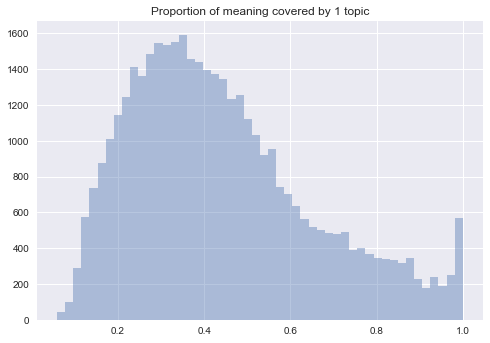

In [40]:
sns.distplot(probs, kde = False)
plt.title('Proportion of meaning covered by 1 topic')
plt.show()

In [41]:
def get_topic_threshold(sentence, vec, tm, thresh):
    '''
    Count the number of topics you need to exceed the threshold.
    When thresh = 0.9, count the number of topics you need to 
    capture 90% of sentence. 
    
    Input:
        sentence(str) : a sentence to be studied
        vec : vectorizer object 
        tm : topic model object 
        thresh (float) : threshold value to be exceeded 
    output:
        counter (int) : the number of topics
    '''
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    
    counter = 0
    prob = 0.0
    if sum(k_index) == 0:
        return counter
    else:
        mat = sorted(k_index/(sum(k_index)), reverse = True)
        while (prob < thresh):
            prob += mat[counter]
            counter += 1
        return counter

In [42]:
get_topic_threshold(sampleA, vec3, tm3, 0.8)

14

In [43]:
topics = []
for review in review_chinese.iloc[ids]['text'].values:
    sent_text = nltk.sent_tokenize(review)
    for s in sent_text:
        p = get_topic_threshold(s, vec3, tm3, 0.8)
        if p != 0:
            topics.append(p)

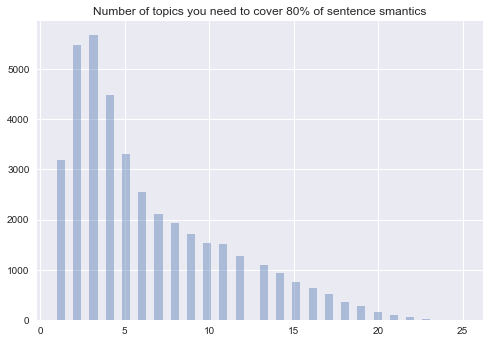

In [236]:
sns.distplot(topics, kde = False)
plt.title('Number of topics you need to cover 80% of sentence smantics')
plt.show()

In [237]:
review_chinese.groupby('business_id').count().sort_values(by='review_id', ascending = False)[:10]

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
yfxDa8RFOvJPQh0rNtakHA,2446,2446,2446,2446,2446,2446,2446,2446
pH0BLkL4cbxKzu471VZnuA,1972,1972,1972,1972,1972,1972,1972,1972
X8c23dur0ll2D9XTu-I8Qg,1548,1548,1548,1548,1548,1548,1548,1548
GJ_bXUPv672YwNg4TneJog,1319,1319,1319,1319,1319,1319,1319,1319
cHdJXLlKNWixBXpDwEGb_A,1262,1262,1262,1262,1262,1262,1262,1262
_j2EtQtgLuXGRBfbM5YwZA,908,908,908,908,908,908,908,908
CCRgGKhzxSpl38w7yhqKUw,863,863,863,863,863,863,863,863
1ZnVfS-qP19upP_fwOhZsA,769,769,769,769,769,769,769,769
vx4YAA02Qz6khRD1fZ1MFA,749,749,749,749,749,749,749,749


In [47]:
def get_avg_k_index_for_doc(doc, vec, tm):
    '''
    generate the k_index embedding (weight vector for K topics) for each review
    Tokenize by each sentence, calculate the embedding and aggregating them
    
    Input:
        doc(str) : a review to be studied
        vec : vectorizer object 
        tm : topic model object 
    output:
        k_index : the weight vector for each topic
    '''
    sent_text = nltk.sent_tokenize(doc)
    if (int(len(sent_text)) == 0):
        return []
    else:
        tm_mat = tm.components_
        k_index = np.array([0.]*tm_mat.shape[0])
        for s in sent_text:
            k, p = get_k_index(s, vec, tm)
            k_index += p
        return k_index/int(len(sent_text))

In [48]:
sampleA

'Great selection of casual authentic Cantonese food. The service was a little slow during lunch hour, and the food was a-ok. Overall a welcome addition to Las Vegas, and I look forward to trying out the many choices, especially the HK style desserts!'

In [49]:
get_avg_k_index_for_doc(sampleA, vec3, tm3)

array([ 0.03077911,  0.22430457,  0.01297452,  0.00191437,  0.00890652,
        0.03712273,  0.01762996,  0.0103428 ,  0.00123841,  0.00418636,
        0.00345124,  0.00405093,  0.06685966,  0.00285239,  0.00835802,
        0.12157116,  0.00267947,  0.01531054,  0.00474613,  0.00896887,
        0.0023799 ,  0.00032491,  0.00267609,  0.0079114 ,  0.02784265,
        0.09040664,  0.00290684,  0.00112155,  0.02383105,  0.00711409,
        0.01681016,  0.00279161,  0.02532583,  0.02009864,  0.00486431,
        0.00687046,  0.02789377,  0.0114841 ,  0.0119738 ,  0.00432095,
        0.00044789,  0.01369072,  0.00495718,  0.03048437,  0.00480891,
        0.00375041,  0.0177207 ,  0.02597714,  0.00673943,  0.00422675])

## Run this algorithm across business

In [50]:
chinese_busi = list(set(review_chinese['business_id']))
random_busi = random.sample(chinese_busi,1000)

In [51]:
sample_table = review_chinese.loc[review_chinese['business_id'].isin(random_busi)]

In [238]:
def build_k_index_embedding(df, vec, tm):
    '''
    Aggregate k_index for each unique business id.
    Find the average k_index of all reviews for this business
    
    Input:
        df(dataframe) : dataframe of reviews
        vec : vectorizer object 
        tm : topic model object 
    output:
        k_index : the weight vector for each topic
    '''
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for d in df['text']:
        k_index += get_avg_k_index_for_doc(d, vec, tm)
    return k_index/df['text'].shape[0]

In [77]:
db = []
for rnd in random_busi:
    tbl = sample_table[sample_table['business_id'] == rnd]
    emd = build_k_index_embedding(tbl, vec3, tm3)
    db.append({'business_id': rnd, 'embedding': emd})

In [78]:
embedding = pd.DataFrame(db)
embedding.to_csv('nmf_embedding.csv', index = False)
embedding.head()

,business_id,embedding
0,Ki4aSG30_W_2KPjqT50o1w,"[0.0347630722279, 0.166845627846, 0.0059597841..."
1,ta8x5JgBJnKaDWfYvpEYnw,"[0.0642083528843, 0.0499467672035, 0.004340375..."
2,cLsE6jJmByJnWisWv8QH_A,"[0.0466506388178, 0.124947376978, 0.0077227884..."
3,w0ArxcJ0XsyK1ZwrIf3gpA,"[0.0909539147821, 0.0605304184206, 0.005805497..."
4,5G0cEcOxAwoPOhGV_B5VlA,"[0.0543127966367, 0.101446777815, 0.0059598480..."


## Define the similarity of 2 business by cosine similarity

In [79]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
mat = []
for e in embedding['embedding'].values:
    mat.append(e)
x = np.matrix(mat)

In [81]:
y = cosine_similarity(x)

In [82]:
print (y[0][y[0].argsort()[:-10:-1]])
np.array(random_busi)[[y[0].argsort()[:-10:-1][0], y[0].argsort()[:-10:-1][1]]]

[ 1.          0.95908088  0.95049513  0.92973078  0.92779383  0.9270727
  0.92418777  0.92182696  0.91861594]


array(['Ki4aSG30_W_2KPjqT50o1w', 'ogcWPQvYDGlCHLkGOBjv4A'], 
      dtype='<U22')

In [83]:
pair = np.array(random_busi)[[y[0].argsort()[:-10:-1][0:10]]]

In [239]:
review_chinese[review_chinese['business_id'].isin(pair)]['text'][:10]

4316    Das Buffet ist sehr groß mit viel Auswahl, das...
4317    Allgemein\nSehr grosser Esstempel. Der vordere...
4318    Absolute Massenabfertigung.\nIdeal für Vieless...
4319    Das All-you-can-eat ist meiner Meinung nach im...
4320    Allgemein\nNicht weiter zu empfehlen.Manche Sp...
4321    Viele Besuche später muss ich meine Meinung be...
4322    Heute war ich "wieder mal" -seit fast 8 Wochen...
4323    Allgemein\nWir waren schon öfters in dem Lokal...
4324    Haben am Silvester kurzfristig noch einen Plat...
4325    Riesig groß und übersatt!\n\n\n Hier gibt es e...
Name: text, dtype: object

In [240]:
embedding[embedding['business_id'].isin(pair)]['embedding']

68     [0.00664170959894, 0.00441037498269, 0.0004523...
790    [0.0168769016179, 0.0025653871593, 0.001847720...
Name: embedding, dtype: object

In [86]:
business[business['business_id'].isin(pair)]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
7368,2379 Queen Street E,"{'RestaurantsTableService': True, 'GoodForMeal...",tisVBZM6OFh1ih4x6rGtDw,"[Chinese, Ethnic Food, Specialty Food, Importe...",Toronto,"{'Monday': '8:00-0:00', 'Tuesday': '8:00-0:00'...",1,43.672499,-79.287349,Garden Gate Restaurant,The Beach,M4E 1H5,41,3.5,ON
24102,"9623 E Independence Blvd, Ste N","{'RestaurantsTableService': True, 'GoodForMeal...",ffXOeotInfX8G_dK5_s6Ag,"[Chinese, Restaurants]",Matthews,"{'Monday': '11:00-21:30', 'Tuesday': '11:00-21...",1,35.135712,-80.712673,Chen-Fu Fast Chinese Food,,28105,20,4.0,NC
33153,1721 E Warner Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",ogcWPQvYDGlCHLkGOBjv4A,"[Restaurants, Chinese]",Tempe,"{'Monday': '11:00-21:00', 'Tuesday': '11:00-21...",0,33.333374,-111.912269,The Magic Wok,,85284,7,4.0,AZ
45215,785 University Ave,"{'Alcohol': 'beer_and_wine', 'HasTV': True, 'N...",NlzU1RxfXaWF6ir-ZWfrLg,"[American (Traditional), Japanese, Chinese, Re...",Madison,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",1,43.073015,-89.398402,Madison Cuisine,Capitol,53715,7,4.0,WI
74637,100 Wellington Street West,"{'GoodForMeal': {'dessert': False, 'latenight'...",Ki4aSG30_W_2KPjqT50o1w,"[Chinese, Restaurants]",Toronto,"{'Friday': '10:00-18:00', 'Tuesday': '10:00-18...",1,43.646954,-79.382159,Eat Canteen,Financial District,M5K 1A1,9,4.0,ON
94351,125 Oakland Ave,"{'RestaurantsTableService': False, 'GoodForMea...",MBirSnTW4pt2k7Ny6KC72w,"[Chinese, Szechuan, Restaurants]",Pittsburgh,"{'Monday': '10:30-22:00', 'Tuesday': '10:30-22...",1,40.441793,-79.957143,Szechuan Express,Oakland,15213,61,3.0,PA
106562,1550 S Gateway Road,"{'RestaurantsTableService': False, 'GoodForMea...",xk4QOTqQHb8FQjge04x_tw,"[Restaurants, Imported Food, Chinese, Specialt...",Mississauga,{},1,43.631962,-79.614444,Dynasty BBQ,,L4W 5J1,11,3.5,ON
141795,446 Hollandview Trail,"{'RestaurantsTableService': False, 'GoodForMea...",ZhoIDHg1tDSgY2FJHYwX1Q,"[Specialty Food, Restaurants, Chinese, Asian F...",Aurora,"{'Monday': '11:30-21:30', 'Friday': '11:30-22:...",1,44.015879,-79.447527,Citi Wok,,L4G 7Z9,9,3.5,ON
147632,739 Queen St E,"{'RestaurantsTableService': False, 'GoodForMea...",TIu83s4sWMdhbwimzdfzIQ,"[Restaurants, Chinese]",Toronto,{},1,43.659188,-79.348408,Lucky Star Restaurant,Riverdale,M4M 1H3,16,4.0,ON


I discovered the similarity in Canadian Chinese restrant reviews

## Investigate with different samples

In [101]:
pair = np.array(random_busi)[[y[3].argsort()[:-3:-1]]]

In [102]:
business[business['business_id'].isin(pair)]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
17624,7777 W Sahara Ave,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",w0ArxcJ0XsyK1ZwrIf3gpA,"[Nightlife, Chinese, Restaurants, Bars, Sports...",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,36.143312,-115.260082,Four Sevens Sports Bar & Restaurant,Westside,89117,76,4.0,NV
20324,"10A Edward Street, Second Floor","{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",joMyW9KcBEsHJxQuAMulaQ,"[Arts & Entertainment, Lounges, Asian Fusion, ...",Toronto,"{'Monday': '17:00-2:00', 'Tuesday': '17:00-2:0...",0,43.656977,-79.381554,Roll Play,Downtown Core,M5G 1C9,111,3.5,ON


In [142]:
closest = []
idx = 0
for i in range(1000):
    close = y[i][y[i].argsort()[:-3:-1]][1]
    if 0.99191131004994981 == close:
        print (i)
    closest.append(close)

156
547


In [120]:
[y[68].argsort()[:-10:-1]]

[array([ 68, 790, 165, 423, 828, 789, 776, 846, 769])]

In [125]:
pair = np.array(random_busi)[[y[68].argsort()[:-3:-1]]]

In [126]:
business[business['business_id'].isin(pair)]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
7259,Eltinger Str. 5,"{'DogsAllowed': False, 'BusinessParking': {'ga...",kTkXjSLoJOUOOgaXT2uv6Q,"[Chinese, Restaurants]",Leonberg,"{'Tuesday': '17:30-23:00', 'Friday': '17:30-23...",1,48.799600,9.017070,China-Restaurant Jasmin,,71229,4,4.0,BW
121600,Rennstr. 30,"{'RestaurantsTableService': True, 'GoodForMeal...",FbodDIyA-3_i98ErrYDa4g,"[Asian Fusion, Restaurants, Chinese, Sushi Bar...",Esslingen,"{'Monday': '17:30-23:30', 'Tuesday': '17:30-23...",1,48.730734,9.322767,Asia Gourmet,,73728,20,3.0,BW


In [149]:
sample1 = reviews[reviews['business_id'] == np.array(random_busi)[y[156].argsort()[:-3:-1]][0]]

In [150]:
sample2 = reviews[reviews['business_id'] == np.array(random_busi)[y[156].argsort()[:-3:-1]][1]]

In [147]:
sample1.shape

(210, 9)

In [148]:
sample2.shape

(116, 9)

In [174]:
for i,j in zip(sample1.head(1).values, sample2.head(1).values):
    print (cosine_similarity(get_avg_k_index_for_doc(i[6],vec3,tm3).reshape(1, -1), get_avg_k_index_for_doc(j[6],vec3,tm3).reshape(1, -1)))

[[ 0.13176707]]


## Find confidence interval by taking 20 samples

In [231]:
def topic_similarity_confidence_interval(reviews, id1, id2, alpha = 0.05, n = 20):
    '''
    build a confidence interval of k_index similarity 
    
    Input:
        reviews(dataframe) : dataframe of reviews
        id1(str) : business_id for sample business 1
        id2(str) : business_id for sample business 2
        a
    output:
        k_index : the weight vector for each topic
    '''
    sample1 = reviews[reviews['business_id'] == id1]
    sample2 = reviews[reviews['business_id'] == id2]
    if sample1.shape[0] < n or sample2.shape[0] < n:
        return None
    else:
        bins = []
        rand1 = random.sample(range(sample1.shape[0]),n)        
        rand2 = random.sample(range(sample2.shape[0]),n)
        sample1 = sample1.iloc[rand1]
        sample2 = sample2.iloc[rand2]
        for i,j in zip(sample1.values, sample2.values):
            sim = cosine_similarity(get_avg_k_index_for_doc(i[6],vec3,tm3).reshape(1, -1), get_avg_k_index_for_doc(j[6],vec3,tm3).reshape(1, -1))
            bins.append(sim)
        mu = np.array(bins).mean()        
        sigma = np.var(np.array(bins), ddof = 1)
        return mu - norm.ppf(1 - alpha/2)*np.sqrt(sigma)/np.sqrt(n), mu + norm.ppf(1 - alpha/2)*np.sqrt(sigma)/np.sqrt(n)

In [232]:
topic_similarity_confidence_interval(reviews, np.array(random_busi)[y[3].argsort()[:-3:-1]][0], np.array(random_busi)[y[3].argsort()[:-3:-1]][1])

(0.39870939527539245, 0.54026800239267658)

In [233]:
for i in range(20):
    mu = topic_similarity_confidence_interval(reviews, np.array(random_busi)[y[i].argsort()[:-3:-1]][0], np.array(random_busi)[y[i].argsort()[:-3:-1]][1])
    if mu:
        print (mu)

(0.38177451520125377, 0.54461843494557982)
(0.4010228211599064, 0.55103626238774905)
(0.30415087880980851, 0.44544987447367779)
(0.30869657664824723, 0.47429023439115037)
(0.36271312573149744, 0.53339694752447109)
(0.3915969818922922, 0.53790532330914576)
(0.31021878257528962, 0.48745838366220479)
(0.30319100662879828, 0.41981671983256807)
(0.3466797190055787, 0.49578252803176559)


Difference in topic distribution becomes much larger when I compare 2 reviews. This is becasue the topic in the review contains much more variance than the emperical distribution of all reviews in one business. 